# Introduction to Graphs

In this tutorial, we will look at [NetworkX](https://networkx.org/documentation/stable/) and introduction of graphs.

NetworkX is one of the most frequently used Python packages to create, manipulate, and mine graphs.

In [6]:
import networkx as nx

In [7]:
nx.__version__

'3.3'

## Graph
NetworkX provides several classes to store different types of graphs, such as directed and undirected graph. It also provides classes to create multigraphs (both directed and undirected).

For more information, please refer to [NetworkX graph types](https://networkx.org/documentation/stable/reference/classes/index.html).

In [3]:
# Create an undirected graph G
G = nx.Graph()
print(G.is_directed())

# Create a directed graph H
H = nx.DiGraph()
print(H.is_directed())

# Add graph level attribute
G.graph["Name"] = "Bar"
print(G.graph)

False
True
{'Name': 'Bar'}


## Node

Nodes (with attributes) can be easily added to NetworkX graphs.

In [4]:
# Add one node with node level attributes
G.add_node(0, feature=5, label=0)

# Get attributes of the node 0
node_0_attr = G.nodes[0]
print("Node 0 has the attributes {}".format(node_0_attr))

Node 0 has the attributes {'feature': 5, 'label': 0}


In [5]:
# Add multiple nodes with attributes
G.add_nodes_from([
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2})
]) #(node, attrdict)

# Loop through all the nodes
# Set data=True will return node attributes
for node in G.nodes(data=True):
  print(node)

# Get number of nodes
num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

(0, {'feature': 5, 'label': 0})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})
G has 3 nodes


The node names don't have to be single integers -- they can be integers or strings or any immutable object, and the types can be mixed.

## Edge

Similar to nodes, edges (with attributes) can also be easily added to NetworkX graphs.

In [6]:
# Add one edge with edge weight 0.5
G.add_edge(0, 1, weight=0.5)

# Get attributes of the edge (0, 1)
edge_0_1_attr = G.edges[(0, 1)]
print("Edge (0, 1) has the attributes {}".format(edge_0_1_attr))

Edge (0, 1) has the attributes {'weight': 0.5}


In [7]:
# Add multiple edges with edge weights
G.add_edges_from([
  (1, 2, {"weight": 0.3}),
  (2, 0, {"weight": 0.1})
])

# Loop through all the edges
# Here there is no data=True, so only the edge will be returned
for edge in G.edges():
  print(edge)

# Get number of edges
num_edges = G.number_of_edges()
print("G has {} edges".format(num_edges))

(0, 1)
(0, 2)
(1, 2)
G has 3 edges


Inserting edges from non-existent nodes will create the missing nodes.

In [8]:
num_nodes = H.number_of_nodes()
print("H has {} nodes".format(num_nodes))
H.add_edges_from([(1,2),(2,3),(3,2),(3,4),(3,5),(4,5),(4,6),(5,6),(6,4),(4,2)])
num_nodes = H.number_of_nodes()
print("H now has {} nodes".format(num_nodes))

H has 0 nodes
H now has 6 nodes


## Visualization

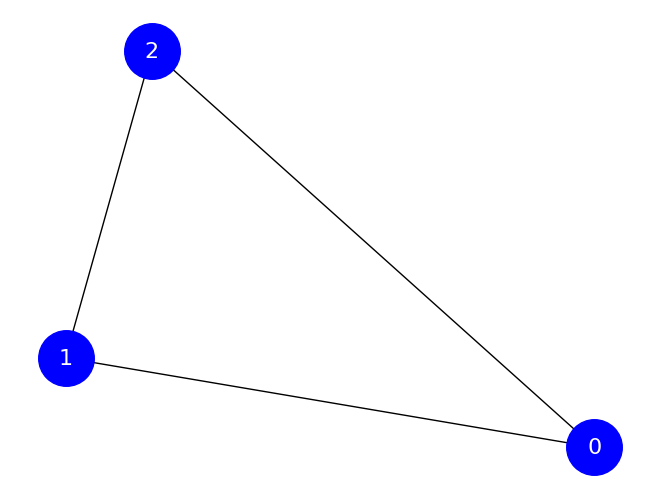

In [9]:
nx.draw(G, with_labels=True, node_color='blue', node_size=1600, font_color='white', font_size=16)

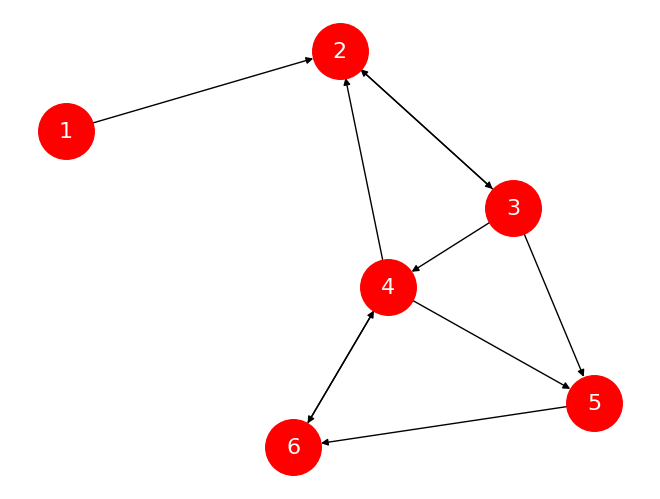

In [10]:
nx.draw(H, with_labels=True, node_color='red', node_size=1600, font_color='white', font_size=16)

## Graph methods

In [11]:
node_id = 1

# Degree of node 1
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

# Get neighbor of node 1
for neighbor in G.neighbors(node_id):
  print("Node {} has neighbor {}".format(node_id, neighbor))

Node 1 has degree 2
Node 1 has neighbor 0
Node 1 has neighbor 2


In [12]:
# Check node existance
print(G.has_node(node_id))

print(G.has_node(node_id + 2))

print(node_id in G)

print(node_id in G.nodes)

True
False
True
True


In [13]:
# Check edge existance
print(G.has_edge(node_id - 1, node_id + 1))

print(G.has_edge(node_id, node_id + 2))

print((node_id - 1, node_id + 1) in G.edges)

True
False
True


Note the asymmetry in graph methods dealing with edges:

In [14]:
H.has_edge(1,2)

True

In [15]:
H.has_edge(2,1)

False

Instead of the symmetric relationship "neighbors", nodes in directed graphs have predecessors ("in-neighbors") and successors ("out-neighbors"). The "neighbors" method is a synonym for "successors".

In [16]:
print('Successors of 2:', list(H.successors(2)))
print('Predecessors of 2:', list(H.predecessors(2)))
print('Neighbors of 2:', list(H.neighbors(2)))

Successors of 2: [3]
Predecessors of 2: [1, 3, 4]
Neighbors of 2: [3]


Directed graphs have in-degree and out-degree, giving the number of edges pointing to and from the given node, respectively. The "degree" method on a directed graph gives the total degree: in-degree plus out-degree.

In [17]:
print('Out-degree of 2:', H.out_degree(2))
print('In-degree of 2:', H.in_degree(2))
print('Degree of 2:', H.degree(2))

Out-degree of 2: 1
In-degree of 2: 3
Degree of 2: 4


## NetworkX functions

In [18]:
nx.is_tree(G)

False

In [19]:
nx.is_connected(G)

True

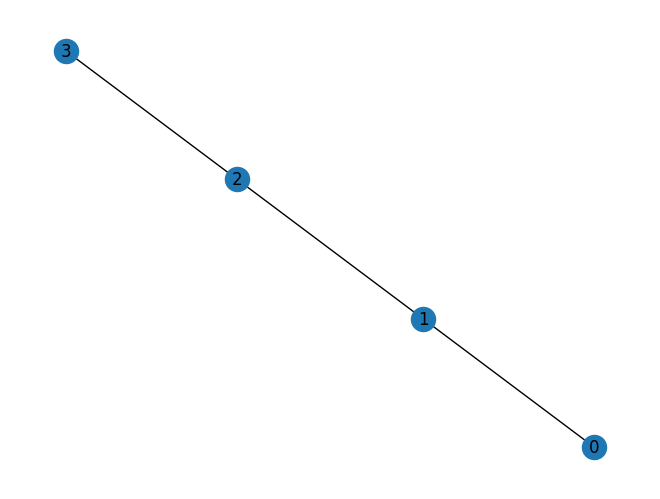

In [20]:
G2 = nx.path_graph(n=4)
nx.draw(G2, with_labels = True)

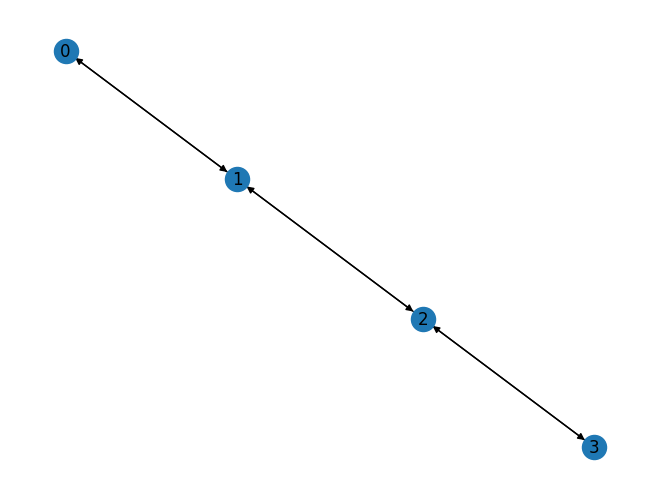

In [21]:
H2 = nx.DiGraph(G2)
nx.draw(H2, with_labels = True)

## Adjacency lists

One compact way to represent a graph is an adjacency list. This is most useful for unweighted graphs, directed or undirected. In an adjacency list, each line contains some number of node names. The first node name is the "source" and each other node name on the line is a "target". For instance, given the following adjacency list:

```
a d e
b c
c
d
e
```
the edges are as follows:

```
(a, d)
(a, e)
(b, c)
```

The nodes on their own line exist so that we are sure to include any singleton nodes. Note that if our graph is undirected, we only need to specify one direction for each edge. Importantly, whether the graph is directed or undirected is often not contained in the file itself -- you have to infer it. This is one limitation of the format.

NetworkX provides a way to read a graph from an adjacency list: nx.read_adjlist().

## Paths

Let's start with a very simple, undirected network.

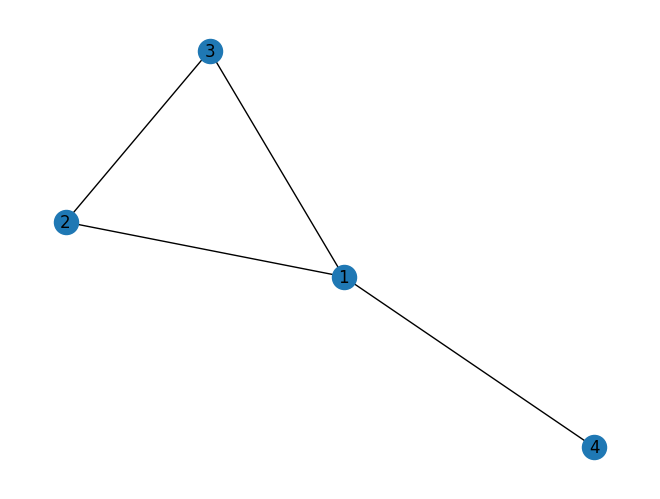

In [22]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4])
G.add_edges_from([(1,2),(2,3),(1,3),(1,4)])
nx.draw(G, with_labels=True)

A path in a network is a sequence of edges connecting two nodes. In this simple example, we can easily see that there is indeed at least one path that connects nodes 3 and 4. We can verify this with NetworkX:

In [23]:
nx.has_path(G, 3, 4)

True

There can be more than one path between two nodes. Again considering nodes 3 and 4, there are two such "simple" paths:

In [24]:
list(nx.all_simple_paths(G, 3, 4))

[[3, 2, 1, 4], [3, 1, 4]]

A simple path is one without any cycles. If we allowed cycles, there would be infinitely many paths because one could always just go around the cycle as many times as desired.

We are often most interested in shortest paths. In an unweighted network, the shortest path is the one with the fewest edges. We can see that of the two simple paths between nodes 3 and 4, one is shorter than the other. We can get this shortest path with a single NetworkX function:

In [25]:
nx.shortest_path(G, 3, 4)

[3, 1, 4]

If you only care about the path length, there's a function for that too:

In [26]:
nx.shortest_path_length(G, 3, 4)

2

Note that a path length is defined here by the number of edges in the path, not the number of nodes, which implies
```
nx.shortest_path_length(G, u, v) == len(nx.shortest_path(G, u, v)) - 1
```
for nodes $u$ and $v$.

We know that in a directed graph, an edge from an arbitrary node $u$ to an arbitrary node $v$ does not imply that an edge exists from $v$ to $u$. Since paths must follow edge direction in directed graphs, the same asymmetry applies for paths. Observe that this graph has a path from 1 to 4, but not in the reverse direction.

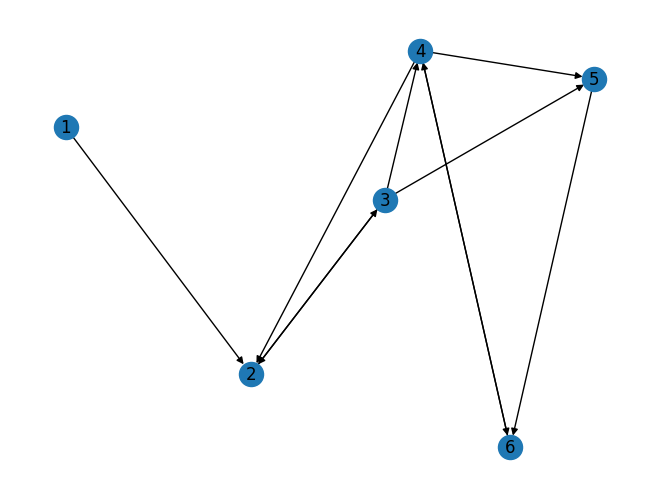

In [27]:
D = nx.DiGraph()
D.add_edges_from([
    (1,2),
    (2,3),
    (3,2), (3,4), (3,5),
    (4,2), (4,5), (4,6),
    (5,6),
    (6,4),
])
nx.draw(D, with_labels=True)

In [28]:
nx.has_path(D, 1, 4)

True

In [29]:
nx.has_path(D, 4, 1)

False

The other NetworkX functions dealing with paths take this asymmetry into account as well:

In [30]:
nx.shortest_path(D, 2, 5)

[2, 3, 5]

In [31]:
nx.shortest_path(D, 5, 2)

[5, 6, 4, 2]

Since there is no edge from 5 to 3, the shortest path from 5 to 2 cannot simply backtrack the shortest path from 2 to 5 -- it has to go a longer route through nodes 6 and 4.

## Connected components

In the simple network above, we can see that for every pair of nodes, we can find a path connecting them. This is the definition of a connected graph. We can check this property for a given graph:

In [32]:
nx.is_connected(G)

True

Not every graph is connected:

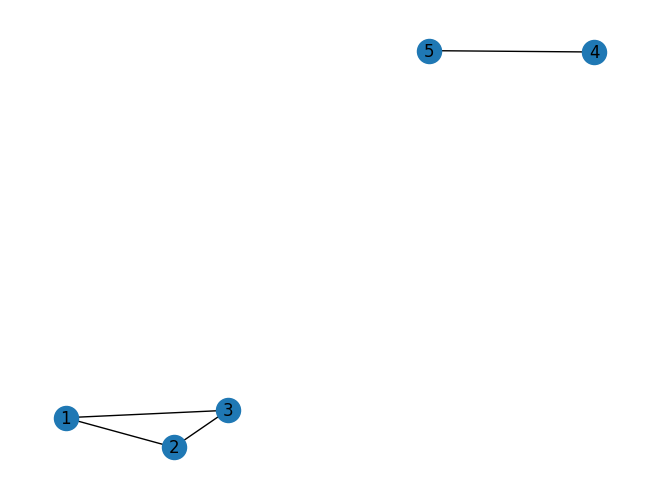

In [33]:
G = nx.Graph()
nx.add_cycle(G, (1,2,3))
G.add_edge(4,5)
nx.draw(G, with_labels=True)

In [34]:
nx.is_connected(G)

False

And NetworkX will raise an error if you ask for a path between nodes where none exists:

In [35]:
nx.has_path(G, 3, 5)

False

In [36]:
#nx.shortest_path(G, 3, 5)

Visually, we can identify two connected components in our graph. Let's verify this:

In [37]:
nx.number_connected_components(G)

2

The nx.connected_components() function takes a graph and returns a list of sets of node names, one such set for each connected component. Verify that the two sets in the following list correspond to the two connected components in the drawing of the graph above:

In [38]:
list(nx.connected_components(G))

[{1, 2, 3}, {4, 5}]

In case you're not familiar with Python sets, they are collections of items without duplicates. These are useful for collecting node names because node names should be unique. As with other collections, we can get the number of items in a set with the len function:

In [39]:
components = list(nx.connected_components(G))
len(components[0])

3

We often care about the largest connected component, which is sometimes referred to as the core of the network. We can make use of Python's builtin max function in order to obtain the largest connected component. By default, Python's max function sorts things in lexicographic (i.e. alphabetical) order, which is not helpful here. We want the maximum connected component when sorted in order of their sizes, so we pass len as a key function:

In [40]:
max(nx.connected_components(G), key=len)

{1, 2, 3}

While it's often enough to just have the list of node names, sometimes we need the actual subgraph consisting of the largest connected component. One way to get this is to pass the list of node names to the G.subgraph() function:

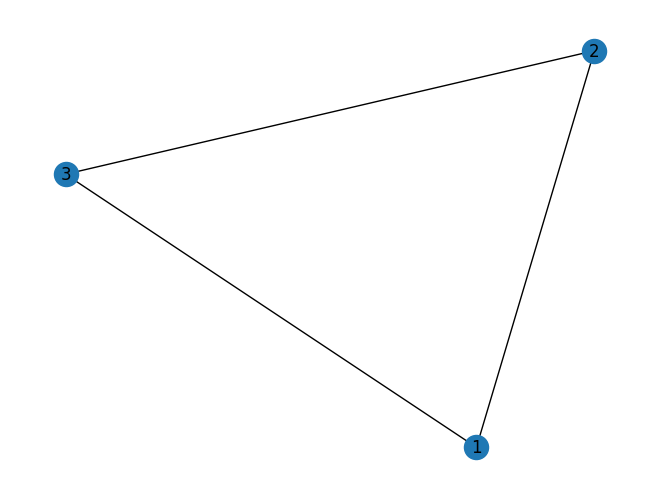

In [41]:
core_nodes = max(nx.connected_components(G), key=len)
core = G.subgraph(core_nodes)
nx.draw(core, with_labels=True)

Directed networks have two kinds of connectivity. Strongly connected means that there exists a directed path between every pair of nodes, i.e., that from any node we can get to any other node while following edge directionality. Think of cars on a network of one-way streets: they can't drive against the flow of traffic.

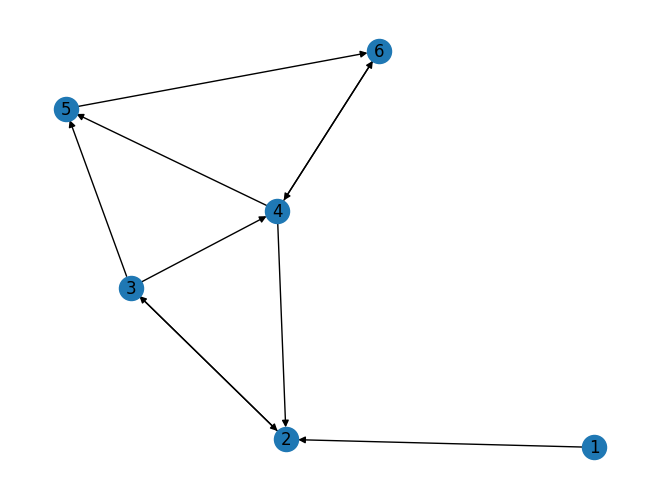

In [42]:
D = nx.DiGraph()
D.add_edges_from([
    (1,2),
    (2,3),
    (3,2), (3,4), (3,5),
    (4,2), (4,5), (4,6),
    (5,6),
    (6,4),
])
nx.draw(D, with_labels=True)

In [43]:
nx.is_strongly_connected(D)

False

Weakly connected means that there exist a path between every pair of nodes, regardless of direction. Think about pedestrians on a network of one-way streets: they walk on the sidewalks so they don't care about the direction of traffic.

In [44]:
nx.is_weakly_connected(D)

True

If a network is strongly connected, it is also weakly connected. The converse is not always true, as seen in this example.

The is_connected function for undirected graphs will raise an error when given a directed graph.

In [45]:
#nx.is_connected(D)

In the directed case, instead of nx.connected_components we now have nx.weakly_connected_components and nx.strongly_connected_components:

In [46]:
list(nx.weakly_connected_components(D))

[{1, 2, 3, 4, 5, 6}]

In [47]:
list(nx.strongly_connected_components(D))

[{2, 3, 4, 5, 6}, {1}]

# EXERCISE 1

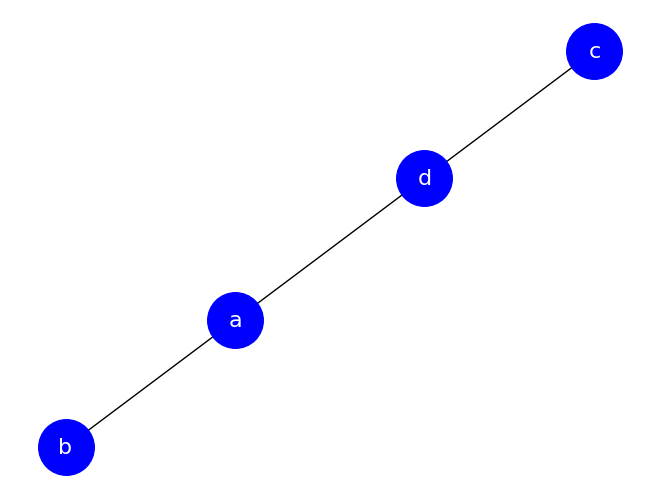

In [48]:
G = nx.Graph()
G.add_edges_from([('a', 'b'), ('a', 'd'), ('c', 'd')])
nx.draw(G, with_labels=True, node_color='blue', node_size=1600, font_color='white', font_size=16)

Often in the context of trees, a node with degree 1 is called a leaf. Write a function named get_leaves that takes a graph as an argument, loops through the nodes, and returns a list of nodes with degree 1.

In [2]:
def get_leaves(G):
    return [node for node in G.nodes if G.degree(node) == 1]

In [59]:
assert set(get_leaves(G)) == {'c', 'b'}

# EXERCISE 2

In [3]:
friends = ["George Frank Dennis", "Dennis Claire Esther", "Claire Frank Alice Esther", "Bob Alice", "Frank Alice", "Alice", "Esther", "Shelly"]
SG = nx.parse_adjlist(friends)
nx.draw(SG, node_size=1500, node_color='lightblue', with_labels=True)

NameError: name 'nx' is not defined

Write a function max_degree that takes a graph as its argument, and returns a 2-tuple with the name and degree of the node with highest degree.

In [61]:
def max_degree(G):
    return max([(node, G.degree(node)) for node in G.nodes], key=lambda x: x[1])

In [62]:
assert max_degree(SG) == ('Claire', 4)

# EXERCISE 3

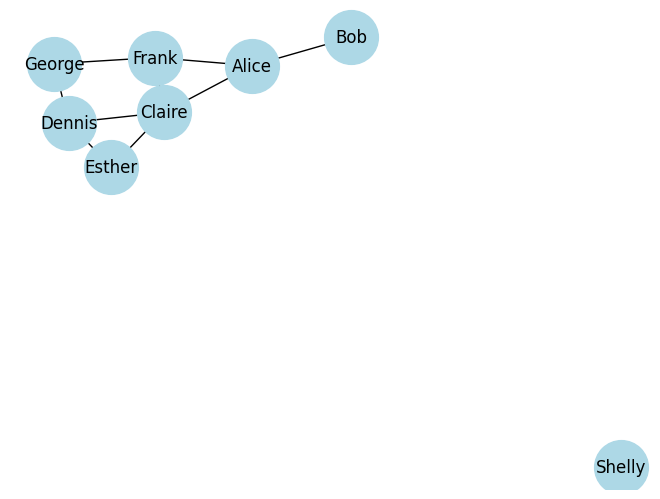

In [63]:
friends = ["George Frank Dennis", "Dennis Claire Esther", "Claire Frank Alice Esther", "Bob Alice", "Frank Alice", "Alice", "Esther", "Shelly"]
SG = nx.parse_adjlist(friends)
nx.draw(SG, node_size=1500, node_color='lightblue', with_labels=True)

Write a function mutual_friends that takes a graph and two nodes as arguments, and returns a list (or set) of nodes that are linked to both given nodes. For example, in the graph SG drawn above,
```
mutual_friends(SG, 'Alice', 'Claire') == ['Frank']
```
an empty list or set should be returned in the case where two nodes have no mutual friends, e.g. George and Bob in SG drawn above.

In [64]:
def mutual_friends(G, node_1, node_2):
    return [node for node in G.nodes if G.has_edge(node_1, node) and G.has_edge(node_2, node)]

In [65]:
assert mutual_friends(SG, 'Alice', 'Claire') == ['Frank']
assert mutual_friends(SG, 'George', 'Bob') == []
assert sorted(mutual_friends(SG, 'Claire', 'George')) == ['Dennis', 'Frank']

# EXERCISE 4

In [8]:
import os
import gdown
url = "https://drive.google.com/uc?id=1aA545NhL9eYD7Qn9daTejRzOe2RJXjHp"
path = "openflights"
filename = "openflights_usa.graphml.gz"
if not os.path.exists(path):
    os.makedirs(path, exist_ok=True)
    gdown.download(url, os.path.join(path, filename), quiet=False)

In [9]:
G = nx.read_graphml(os.path.join(path, filename))

The nodes in this graph are airports, represented by their [IATA codes](https://en.wikipedia.org/wiki/List_of_airports_by_IATA_code:_A); two nodes are connected with an edge if there is a scheduled flight directly connecting these two airports. We'll assume this graph to be undirected since a flight in one direction usually means there is a return flight.

Thus this graph has edges
```
[('HOM', 'ANC'), ('BGM', 'PHL'), ('BGM', 'IAD'), ...]
```
where ANC is Anchorage, IAD is Washington Dulles, etc.

These nodes also have **attributes** associated with them, containing additional information about the airports:

In [68]:
G.nodes['IND']

{'name': 'Indianapolis International Airport',
 'latitude': 39.7173,
 'longitude': -86.294403,
 'IATA': 'IND'}

Node attributes are stored as a dictionary, so the values can be accessed individually as such:

In [69]:
G.nodes['IND']['name']

'Indianapolis International Airport'

Is there a direct flight between Indianapolis and Fairbanks, Alaska (FAI)? A direct flight is one with no intermediate stops.

In [72]:
G.has_edge('IND', 'FAI')

False

# EXERCISE 5

If I wanted to fly from Indianapolis to Fairbanks, Alaska what would be an itinerary with the fewest number of flights?

In [78]:
nx.shortest_path(G, 'IND', 'FAI')

['IND', 'BOS', 'SEA', 'FAI']

# EXERCISE 6

Is it possible to travel from any airport in the US to any other airport in the US, possibly using connecting flights? In other words, does there exist a path in the network between every possible pair of airports?

In [10]:
nx.is_connected(G)

False

In [11]:
nx.number_connected_components(G)

3

In [13]:
components = list(nx.connected_components(G))
print(components[0])
print(components[1])
print(components[2])

{'JAN', 'CDR', 'YUM', 'ROA', 'GDV', 'PGD', 'CIU', 'LAS', 'ATY', 'SVA', 'VEL', 'HPN', 'OOK', 'BRO', 'EWB', 'LBE', 'FKL', 'BJI', 'MGM', 'IRC', 'BLI', 'SCK', 'SBY', 'YNG', 'HOT', 'PIB', 'AVP', 'KLG', 'CLT', 'KUK', 'ECP', 'HUS', 'AUS', 'MCN', 'SBP', 'JST', 'CMI', 'KWN', 'GRB', 'DHN', 'OME', 'RAP', 'ELP', 'ILG', 'CNY', 'PIP', 'AGN', 'MLU', 'ELI', 'PSC', 'LAN', 'VDZ', 'GGG', 'EWN', 'MHK', 'LBL', 'ELD', 'RSW', 'AOO', 'OGS', 'CHO', 'BFL', 'CAK', 'CEZ', 'GSO', 'CEM', 'LWB', 'ROW', 'TWF', 'SCM', 'SGU', 'GFK', 'MBS', 'PTU', 'GJT', 'PNS', 'HLN', 'KVL', 'WSN', 'ATW', 'OGD', 'HYG', 'LAW', 'MEM', 'LIH', 'LFT', 'ARC', 'OTH', 'FLG', 'LRD', 'FCA', 'RIW', 'HSL', 'ATK', 'ACT', 'EGX', 'WRL', 'SHV', 'IAG', 'MCE', 'GNV', 'BRL', 'OMA', 'LEX', 'CKB', 'AGS', 'HRL', 'ELV', 'LBB', 'KWK', 'VIS', 'JBR', 'ABL', 'SWF', 'SPI', 'MEI', 'EGE', 'IAN', 'TUL', 'ALS', 'ORV', 'SNP', 'TPA', 'BZN', 'ACK', 'KLN', 'GPT', 'DAB', 'SNA', 'YKM', 'MOT', 'SCC', 'PDX', 'SGF', 'DRO', 'MCI', 'GLV', 'TOL', 'AKN', 'CSG', 'FNT', 'CRP', 'CLD'